In [1]:
import os

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset
import matplotlib.pyplot as plt


DATA_DIR = os.environ.get('VISION_DATA_DIR')

config = Configuration.create('configs/scorestamp-data.yaml')
train, val = loadDataset(config, data_dir=DATA_DIR, device='cpu')

it = iter(train)
batch = next(it)
print(batch[0].dtype, batch[0].shape, batch[1].dtype, batch[1].shape)


torch.float32 torch.Size([1, 1, 32, 32]) torch.int64 torch.Size([1])


label: 0


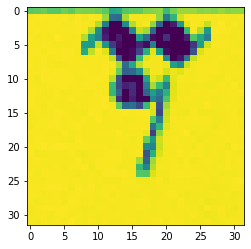

In [2]:
batch = next(it)

print('label:', batch[1][0].item())
plt.imshow(batch[0][0, 0])


In [1]:
import torch
from starry.vision.models.glyphRecognizer import GlyphRecognizer


model = GlyphRecognizer(n_classes=10)
y = model(torch.randn(2, 1, 32, 32))

y.shape

torch.Size([2, 10])

In [1]:
import os
import torch
from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset
from starry.utils.model_factory import loadModel


DATA_DIR = os.environ.get('VISION_DATA_DIR')

config = Configuration.create('configs/scoreglyph-timesig-test.yaml')
train, val = loadDataset(config, data_dir=DATA_DIR, device='cpu')
model = loadModel(config['model'], postfix='Loss')

it = iter(train)

batch = next(it)
loss, metric = model(batch)

print('loss:', loss)
print('metric:', metric)


loss: tensor(2.7821, grad_fn=<NllLossBackward0>)
metric: {'acc': tensor(0.)}
